In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
em = pd.read_csv("N_sweep/N=10/0.00T5.00_EM_v0.csv")
em= em[1:]

In [3]:
def error(X, k = 0.001):
    return 0.25*X*np.exp(k)

def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

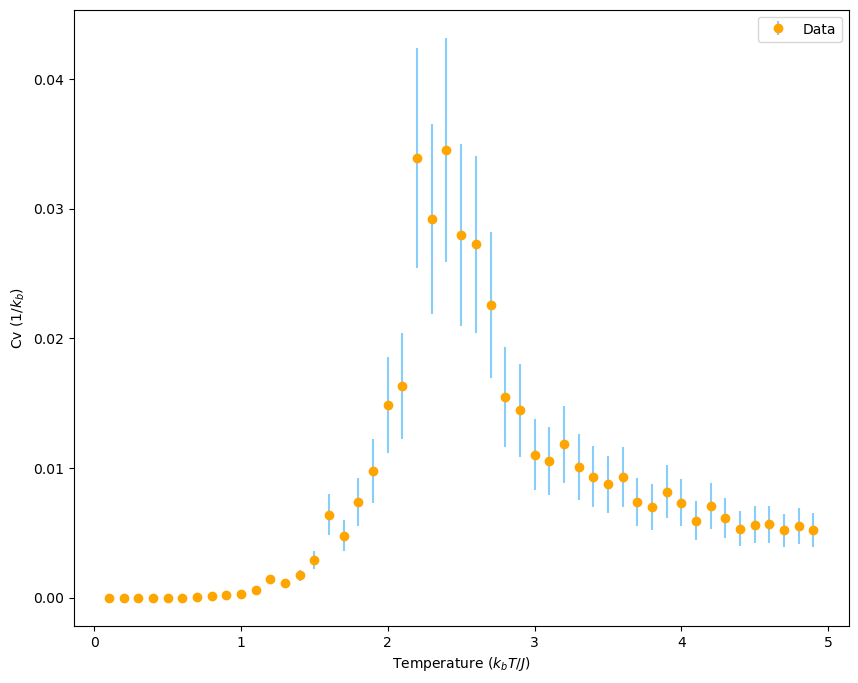

In [10]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], get_cv(em), yerr = error(get_cv(em)),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")

plt.xlabel("Temperature ($k_bT/J$)")
plt.ylabel("Cv ($1/k_b$)")
plt.legend()

In [4]:
def exponential_growth(x, k, A):
    return A*np.exp(x / k)
# Exponential decay function
def exponential_decay(x, k,A):
    return A*np.exp(-x / k)

In [6]:
true_tc = 2.269

difference_array = np.absolute(em["Temp"]-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

# Left Fit



popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
# plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data",color = "firebrick", zorder = 2)
# plt.errorbar(em["Temp"][0:index], get_cv(em)[0:index], yerr = error(get_cv(em)[0:index]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
# #plt.plot(em["Temp"][0:index], get_cv(em)[0:index], label= "Actual Data")
# #plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
# #plt.legend()


# #plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
# #plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
# #plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )

# plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
# plt.ylabel("Cv ($1/k_b$)", fontsize=18)
# plt.title("Below Tc")
# plt.legend()
# plt.show()


/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_63800/859796718.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))


In [9]:
# Right Fit
#fig = plt.figure()
#ax = fig.add_subplot()
popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))
# plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
# plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
# #plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
# #plt.axis([0, 10, 0, 10])
# plt.text(3.5, 0.00045, r' $\chi^2=$', fontsize=15)
# plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
# plt.ylabel("Cv ($1/k_b$)", fontsize=18)
# plt.legend(prop={'size': 6})
# plt.title("Above Tc")
# plt.show()


/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_63800/604511337.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))


/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_62724/876275248.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_62724/876275248.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data

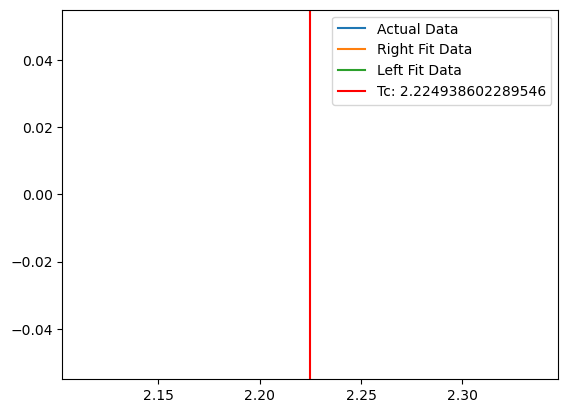

In [18]:
min_cutoff = 175
max_cutoff = 250

plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


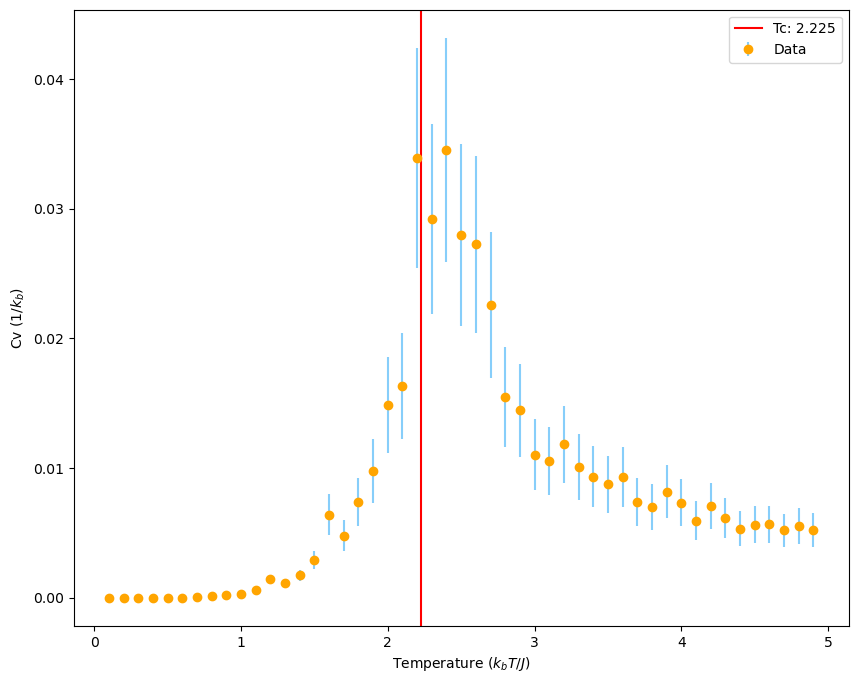

In [10]:
#Overlay Fits
# Add Tc Error! + chi squared

fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], get_cv(em), yerr = error(get_cv(em)),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {0:.3f}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()
plt.xlabel("Temperature ($k_bT/J$)")
plt.ylabel("Cv ($1/k_b$)")
plt.legend()
plt.show()

In [11]:
Tc = (- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])
Tc

2.224938602289546

In [12]:
tc_err = np.sqrt((0.434* np.sqrt(pcov_l[1][1])/popt_l[1])**2 + (0.434* np.sqrt(pcov_r[1][1])/popt_r[1])**2 + (np.sqrt(pcov_l[0][0]) + np.sqrt(pcov_r[0][0]))**2)
tc_err

0.2833776765903819

## Method

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [32]:
def error(X, k = 0.001):
    return 0.25*X*np.exp(k)

def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

def exponential_growth(x, k, A):
    return A*np.exp(x / k)
# Exponential decay function
def exponential_decay(x, k,A):
    return A*np.exp(-x / k)

In [33]:
em = pd.read_csv("N_sweep/N=10/0.00T5.00_EM_v0.csv")
em= em[1:]

In [34]:
true_tc = 2.269

difference_array = np.absolute(em["Temp"]-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))
Tc = (- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])
print(Tc)
tc_err = np.sqrt((0.434* np.sqrt(pcov_l[1][1])/popt_l[1])**2 + (0.434* np.sqrt(pcov_r[1][1])/popt_r[1])**2 + (np.sqrt(pcov_l[0][0]) + np.sqrt(pcov_r[0][0]))**2)
print(tc_err)

2.224938602289546
0.2833776765903819


/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_64014/1814653041.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_64014/1814653041.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))


/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_64014/437316155.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_64014/437316155.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))
/var/folders/ff/g5jppyj915n

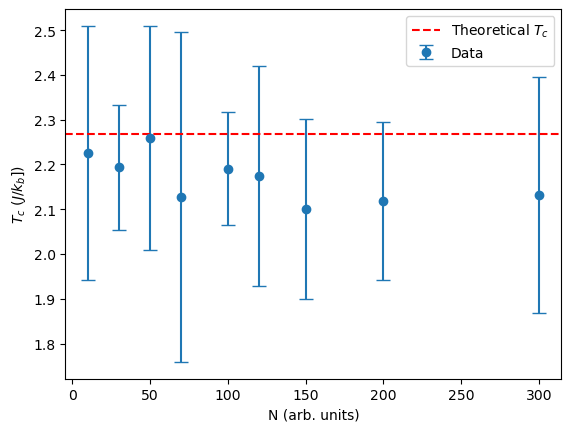

In [40]:
N_values = [10, 30, 50, 70, 100, 120, 150, 200, 300]
true_tc = 2.269
Tc_values = []
tc_err_values = []

for N in N_values:
    em = pd.read_csv(f"N_sweep/N={N}/0.00T5.00_EM_v0.csv")
    em = em[1:]

    difference_array = np.absolute(em["Temp"] - true_tc)

    # find the index of minimum element from the array
    index = difference_array.argmin()

    popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
    popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))
    Tc = (-np.log(popt_l[1]) + np.log(popt_r[1])) / (1 / popt_l[0] + 1 / popt_r[0])
    Tc_values.append(Tc)

    tc_err = np.sqrt((0.434 * np.sqrt(pcov_l[1][1]) / popt_l[1]) ** 2 + (0.434 * np.sqrt(pcov_r[1][1]) / popt_r[1]) ** 2 + (np.sqrt(pcov_l[0][0]) + np.sqrt(pcov_r[0][0])) ** 2)
    tc_err_values.append(tc_err)

# Plotting Tc and Error
plt.errorbar(N_values, Tc_values, yerr=tc_err_values, fmt='o', capsize=5, label='Data')
plt.xlabel('N (arb. units)')
plt.ylabel(r'$T_c$ ($J/k_b$])')
# plt.title('Critical Temperature vs. N')

# add a horizontal line at the theoretical value of Tc
plt.axhline(y=true_tc, color='r', linestyle='--', label = r'Theoretical $T_c$')
plt.legend()
plt.show()

# N_step Convergence

/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_64014/2011119685.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
/var/folders/ff/g5jppyj915n4y1tccvvmwct00000gn/T/ipykernel_64014/2011119685.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))
/var/folders/ff/g5jppyj91

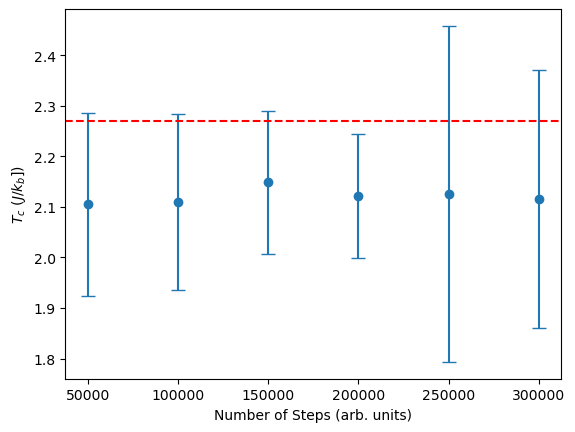

In [43]:
step_values = [50000, 100000, 150000, 200000, 250000, 300000]
true_tc = 2.269
Tc_values = []
tc_err_values = []

for steps in step_values:
    em = pd.read_csv(f"n_steps_sweep/{steps}_steps/0.00T5.00_EM_v0.csv")
    em = em[1:]

    difference_array = np.absolute(em["Temp"] - true_tc)

    # find the index of minimum element from the array
    index = difference_array.argmin()

    popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
    popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))
    Tc = (-np.log(popt_l[1]) + np.log(popt_r[1])) / (1 / popt_l[0] + 1 / popt_r[0])
    Tc_values.append(Tc)

    tc_err = np.sqrt((0.434 * np.sqrt(pcov_l[1][1]) / popt_l[1]) ** 2 + (0.434 * np.sqrt(pcov_r[1][1]) / popt_r[1]) ** 2 + (np.sqrt(pcov_l[0][0]) + np.sqrt(pcov_r[0][0])) ** 2)
    tc_err_values.append(tc_err)

# Plotting Tc and Error
plt.errorbar(step_values, Tc_values, yerr=tc_err_values, fmt='o', capsize=5)
plt.xlabel('Number of Steps (arb. units)')
plt.ylabel(r'$T_c$ ($J/k_b$])')
# plt.title('Critical Temperature vs. Number of Steps')
plt.axhline(y=true_tc, color='r', linestyle='--', label = r'Theoretical $T_c$')
plt.show()